# Shapefile examples (EEA/NSIDC)

#### Requirements:
- Python (Anaconda recommended)
- IDE / Text editor that can handle Jupyter Notebooks
- Packages:
    - geopandas
    - matplotlib
    - cartopy
    - numpy

- System:
    - Tested on Windows but should work on Linux, too

#### Other:
- Browse EEA data: https://www.eea.europa.eu/data-and-maps/find/global#b_start=0
- Browse NSIDC data: https://nsidc.org/data/search

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import os
from ftplib import FTP
import cartopy.feature as cf
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#source of this cell : https://nsidc.org/support/64231694-FTP-Client-Data-Access

# NSIDC
# Sample script to download all the files within one directory on the FTP server

### The following 3 variables can be changed ###
# 1. Set the directory you would like to download the files to
# (now destdir is current directory)
destdir= os.getcwd()
#this is sometimes needed, since the format needs to be "path\\to\\location" on Windows
if not "\\\\" in destdir:
    destdir = destdir.replace("\\","\\\\")
print("Destination of the files " + destdir)
# 2. Set the path to the FTP directory that contains the data you wish to download.
# This example is for Circum-Arctic Map of Permafrost and Ground-Ice Conditions
# https://nsidc.org/data/ggd318/versions/2
# go to the site, right-click "FTP File System" -> "Copy link Address" and you should see
# the adress "ftp://sidads.colorado.edu/pub/DATASETS/fgdc/ggd318_map_circumarctic/"
directory = '/DATASETS/fgdc/ggd318_map_circumarctic/'
# 3. Set the password which will be your email address
# (this seems to often be unnececcary)
password = 'email_address'

############################################
### Don't need to change this code below ###
############################################
# FTP server
ftpdir = 'sidads.colorado.edu'
#Connect and log in to the FTP
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('USER','PASS')

# Change to the directory where the files are on the FTP
print('Changing to '+ directory)
ftp.cwd(directory)

# Get a list of the files in the FTP directory
files = ftp.nlst()
files = files[2:]
# If this prints directories (i.e. no file format), en error occurs. The directories can be manually removed 
# or if they contain someting important, you can change the to directory to e.g. directory = /DATASETS/NOAA/G10010_V2/shapefiles/
print(files)
#Change to the destination directory on own computer where you want to save the files
os.chdir(destdir)

#Download all the files within the FTP directory
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)

#Close the FTP connection
ftp.quit()


Destination of the files c:\\Users\\strang\\Documents\\project
Logging in
Changing to /DATASETS/fgdc/ggd318_map_circumarctic/
['README.txt', 'ipa_map_brws.gif', 'llipa.byte', 'llipa.hdr', 'nhipa.byte', 'nhipa.hdr', 'nlipa.byte', 'nlipa.hdr', 'permaice.avl', 'permaice.dbf', 'permaice.prj', 'permaice.shp', 'permaice.shx', 'readpf.f', 'subsea.avl', 'subsea.dbf', 'subsea.prj', 'subsea.shp', 'subsea.shx', 'treeline.avl', 'treeline.dbf', 'treeline.prj', 'treeline.shp', 'treeline.shx']
Downloading...README.txt
Downloading...ipa_map_brws.gif
Downloading...llipa.byte
Downloading...llipa.hdr
Downloading...nhipa.byte
Downloading...nhipa.hdr
Downloading...nlipa.byte
Downloading...nlipa.hdr
Downloading...permaice.avl
Downloading...permaice.dbf
Downloading...permaice.prj
Downloading...permaice.shp
Downloading...permaice.shx
Downloading...readpf.f
Downloading...subsea.avl
Downloading...subsea.dbf
Downloading...subsea.prj
Downloading...subsea.shp
Downloading...subsea.shx
Downloading...treeline.avl
Dow

'221-Goodbye. You uploaded 0 and downloaded 24107 kbytes.\n221 Logout.'

In [3]:
#paths to files (backslashes may need to be adjusted) 
treeline = destdir+"\\\\treeline.shp"
subsea = destdir+"\\\\subsea.shp"
permaice = destdir+"\\\\permaice.shp"

In [4]:
#opening Shapefiles into GeoDataFrames
treeline_df = gpd.read_file(treeline)
subsea_df = gpd.read_file(subsea)
permaice_df = gpd.read_file(permaice)

In [5]:
#SECOND DATA
#data from https://www.eea.europa.eu/data-and-maps/data/projected-change-in-the-percentage -> 
#https://sdi.eea.europa.eu/data/8e5ee71f-1136-4a07-b5fd-fb22bd9592e9
#note that you need all of the files, not just the ones that end with .shp
High_sh = "HighImpactScenario.shp"
Med_sh = "MediumImpactScenario.shp"
Low_sh = "LowImpactScenario.shp"

#opening Shapefiles into GeoDataFrames
High = gpd.read_file(High_sh)
Med = gpd.read_file(Med_sh)
Low = gpd.read_file(Low_sh)

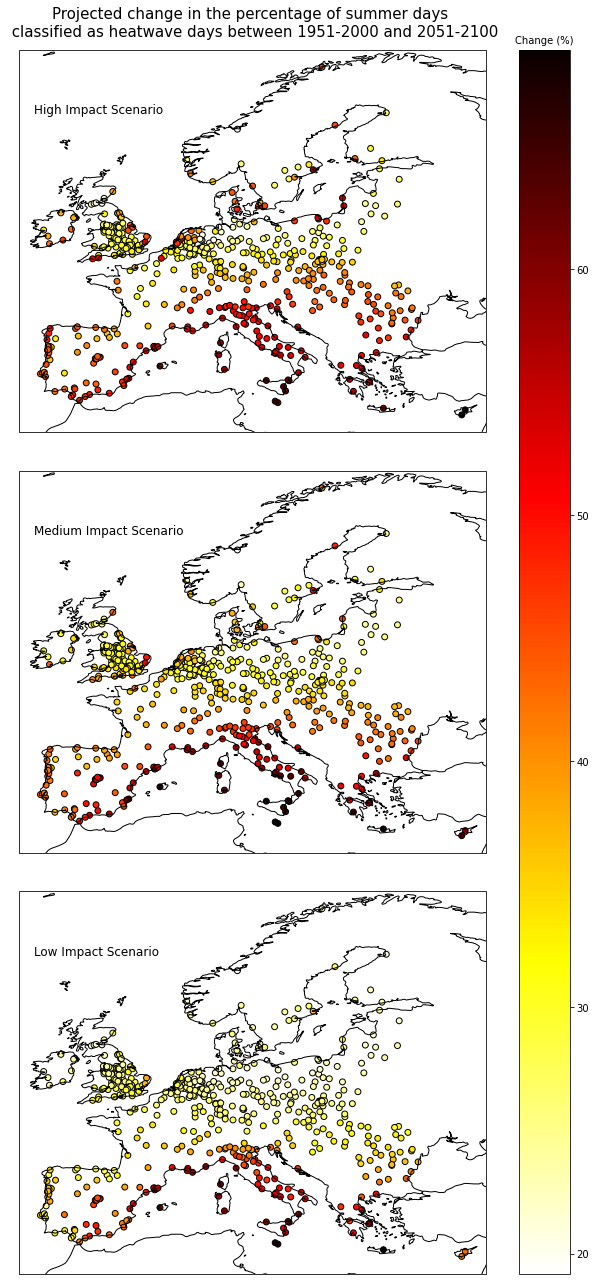

In [7]:
#figure, axes and projection
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,20))
#add coasdtlines to all subplots
axs[0].coastlines()
axs[1].coastlines()
axs[2].coastlines()
#plot scenarios. Here the shape is POINT so we have x and y coordinates of each. 
# s = size of POINT, c = color (based on the value of the POINT)
cs = axs[0].scatter(High.geometry.x,High.geometry.y,s=35,c=High["HWD_high"],cmap='hot_r', edgecolors='black')
axs[1].scatter(Med.geometry.x,Med.geometry.y,s=35,c=Med["heatdays"],cmap='hot_r', edgecolors='black')
axs[2].scatter(Low.geometry.x,Low.geometry.y,s=35,c=Low["HWD_low"],cmap='hot_r', edgecolors='black')
#add description to plots
axs[0].text(-10,65, "High Impact Scenario", size=12)
axs[1].text(-10,65, "Medium Impact Scenario", size=12)
axs[2].text(-10,65, "Low Impact Scenario", size=12)
#new axis for shared colorbar
cbar_ax = fig.add_axes([0.87, 0.10, 0.07, 0.85])
#add colorbar, mappable is the first plot
cbar = fig.colorbar(cs, cax=cbar_ax)
#colorbar title
cbar.ax.set_title('Change (%)',fontsize=10)
#suptitle for the figure
plt.suptitle("Projected change in the percentage of summer days \n classified as heatwave days between 1951-2000 and 2051-2100", size=15)
#adjust the location of the subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.2, 
                    hspace=0.1)

In [5]:
def return_color(codes):
    #match area code and color
    dic = {"25" : "brown", "24" : "blue", "23" : "deepskyblue", "22" : "silver", "21" : "white", "20" : "darkviolet", "19" : "aquamarine", "18" : "teal", "17" : "dimgrey", "16" : "darkviolet", "15" : "aquamarine", "14" : "teal", "13" : "dimgrey", "12" : "darkviolet", "11" : "aquamarine", "10" : "teal", "9" : "dimgrey", "8" : "darkviolet", "7" : "aquamarine", "6" : "teal", "5" : "dimgrey", "4" : "darkviolet", "3" : "aquamarine", "2" : "teal", "1" : "dimgrey", "0" : "black"}
    colors = [dic[key] for key in codes]
    return colors

In [6]:
#create colormap from area colors

#list of colors
cm_list=sorted(list(set(return_color(set(permaice_df.NUM_CODE)))))
#colormap from list
cmap = matplotlib.colors.ListedColormap(cm_list)
#mappable from colormap
sm = plt.cm.ScalarMappable(cmap=cmap)
#limits of mappable
sm.set_array([np.linspace(0.5, len(cm_list)+0.5, len(cm_list))])

Text(4000000.0, 5000000.0, 'Yellow = Subsea extent \n Lime = Tree line')

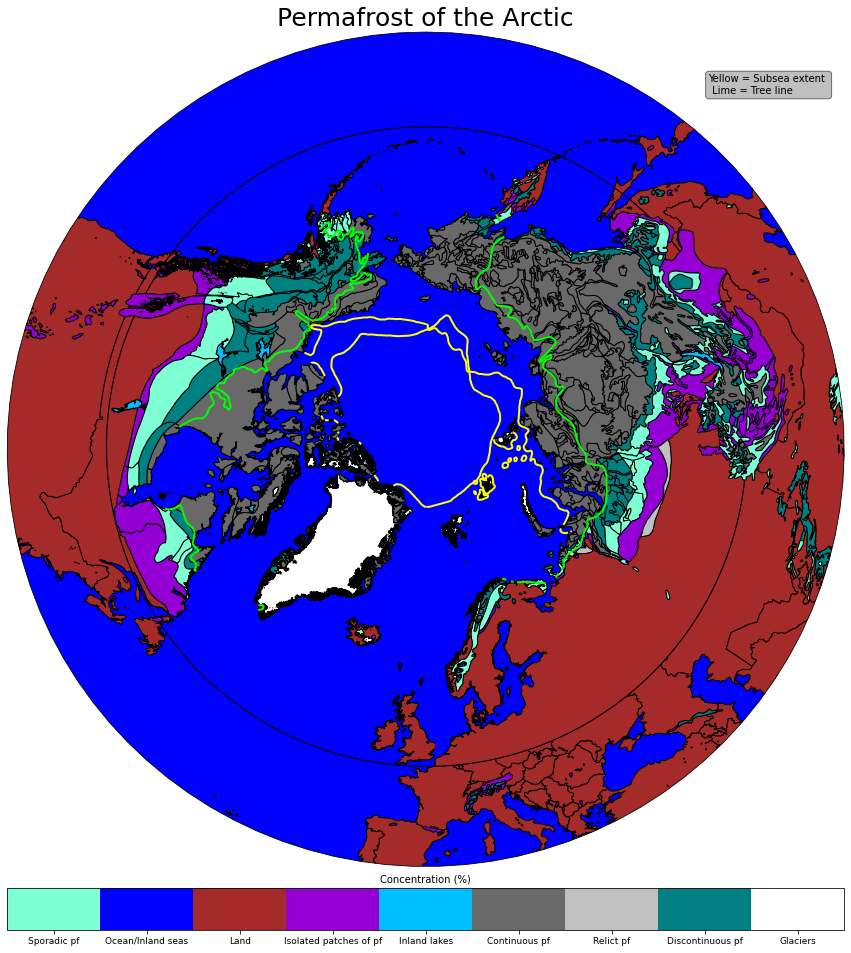

In [7]:
#figure, axes, projection
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.NorthPolarStereo()},
                        figsize=(15,25))
#loop through permafrost areas, color for each area. Shape is POLYGON
[axs.add_geometries(permaice_df.geometry[permaice_df.NUM_CODE == str(i)], ccrs.AzimuthalEquidistant(central_longitude=180.0, central_latitude=90.0),\
                        edgecolor='black', facecolor=return_color(permaice_df.NUM_CODE[permaice_df.NUM_CODE == str(i)]), linewidth=1) for i in set(permaice_df.NUM_CODE)]
#limit the area to 40-90 N                        
axs.set_extent((0,361,40,90),crs=ccrs.PlateCarree())
#add treeline. Shape is LINESTRING
axs.add_geometries(treeline_df.geometry, ccrs.AzimuthalEquidistant(central_longitude=180.0, central_latitude=90.0),\
                          edgecolor='lime', facecolor="None", linewidth=2)
#add subsea extent. Shape is LINESTRING
axs.add_geometries(subsea_df.geometry, ccrs.AzimuthalEquidistant(central_longitude=180.0, central_latitude=90.0),\
                          edgecolor='yellow', facecolor="None", linewidth=2)
#format the figure into a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5,0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs.set_boundary(circle, transform=axs.transAxes)
#set title for the plot
axs.set_title("Permafrost of the Arctic", size=25)
#define axis for the colorbar
divider = make_axes_locatable(axs)
ax_cb = divider.new_vertical(size="5%", pad=0.3, axes_class=plt.Axes, pack_start=True)
#add new axis
fig.add_axes(ax_cb)
#add colorbar, set labels to middle of each cell
cb = fig.colorbar(sm, cax=ax_cb, orientation="horizontal", ticks=[1,2,3,4,5,6,7,8,9])
#title for colorbar
cb.ax.set_title('Concentration (%)',fontsize=10)
#set colorbar labels
cb.ax.set_xticklabels(['Sporadic pf', 'Ocean/Inland seas', 'Land', 'Isolated patches of pf', 'Inland lakes', 'Continuous pf', 'Relict pf', 'Discontinuous pf', 'Glaciers'])
#adjust font of colorbar labels
cb.ax.tick_params(labelsize=9)
#format bounding box 
attrs = dict(boxstyle='round', facecolor='gray', alpha=0.5)
#add labels in a bounding box
axs.text(4e6, 5e6, "Yellow = Subsea extent \n Lime = Tree line", bbox=attrs)